# Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA

# Load the digits dataset

In [2]:
digits = load_digits()

# Display dataset keys

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


# Visualize some of the digits

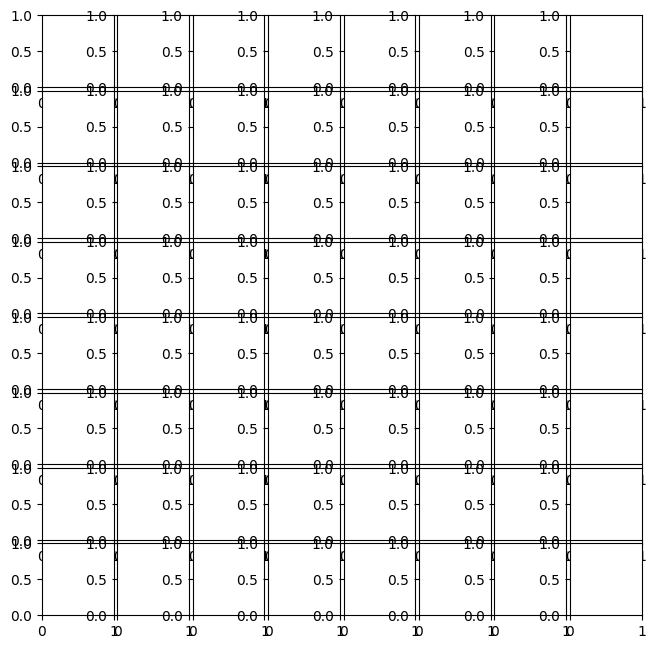

In [4]:
fig, axes = plt.subplots(8, 8, figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

In [7]:
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]), color='red', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

# Flatten image data into feature matrix

In [8]:
X = digits.data
y = digits.target

# Split data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Initialize Random Forest Classifier with default parameters

In [10]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model

In [11]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

# Predict on test set

In [12]:
y_pred = rf.predict(X_test)

# Evaluate the model

In [13]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Accuracy Score: 0.9722222222222222


# Confusion Matrix

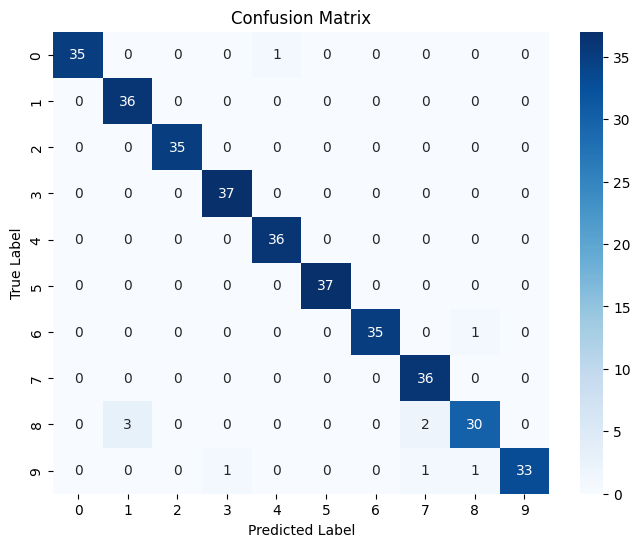

In [14]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Confusion Matrix**

The diagonal elements represent correctly classified digits.
Most digits are correctly classified, with minimal misclassification.
Some misclassification is observed for digits 8 and 9, with a few instances being mistaken for other digits.

📌 **Key Takeaways:**

The model confuses 8 with 3 (3 misclassified as 8) and 9 with 8 (1 misclassified).

Digits with similar structures (e.g., 8 & 3, 9 & 8) are more prone to misclassification.


# Feature Importance Visualization

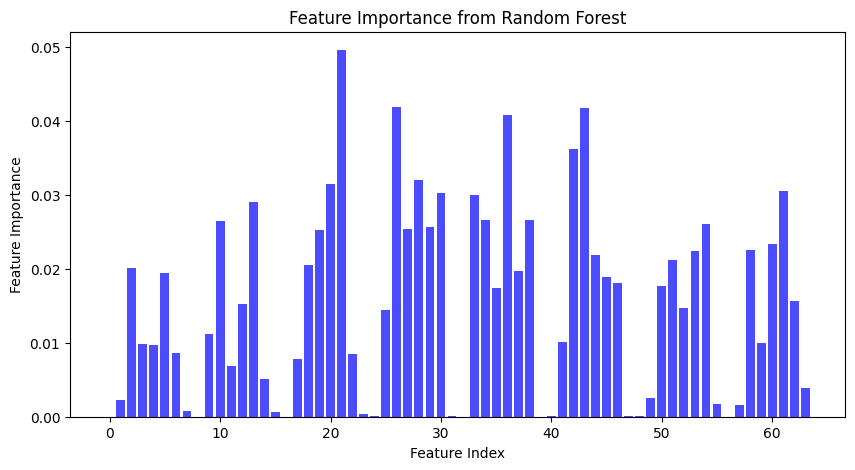

In [15]:
plt.figure(figsize=(10, 5))
importance = rf.feature_importances_
plt.bar(range(len(importance)), importance, color='b', alpha=0.7)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

**Feature Importance from Random Forest**

This graph illustrates which pixels contribute the most to classification.
Certain pixel locations are significantly more important than others.

The most informative pixels seem to be in the middle of the digit images, likely representing key strokes or loops in the handwritten digits.

📌 **Key Takeaways:**

The Random Forest model effectively identifies which pixel locations are most crucial for distinguishing digits.

The highest importance values align with stroke intersections and edges in digits.


# Hyperparameter Tuning with GridSearchCV

In [16]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

# Display best parameter

In [17]:
print("Best Parameters from GridSearch:", grid_search.best_params_)

Best Parameters from GridSearch: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


**Hyperparameter Tuning with GridSearchCV**

The best parameters selected:

max_depth: 20 (controls the depth of trees, preventing overfitting).

min_samples_leaf: 1 (ensures model learns from all data points).

min_samples_split: 2 (ensures splits happen when necessary).

n_estimators: 500 (controls the number of trees in the forest).

📌 **Key Takeaways:**

GridSearchCV helped fine-tune the model, ensuring optimal performance and generalization.

The chosen parameters balance complexity vs. overfitting.

# Train optimized model

In [18]:
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# Evaluate optimized model

In [19]:
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_optimized))
print("Optimized Accuracy Score:", accuracy_score(y_test, y_pred_optimized))

Optimized Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Optimized Accuracy Score: 0.9722222222222222


**Optimized Classification Report**

Accuracy remains at 97.22%, indicating that hyperparameter tuning didn’t significantly change the model's performance.

F1-scores, precision, and recall remain high across all classes.
The lowest recall (86% for digit 8) is still present.

📌 **Key Takeaways:**

Hyperparameter tuning stabilized model performance, but the accuracy remains similar.

Some digits (like 8) remain harder to classify, suggesting possible dataset challenges or feature overlap.

# Cross-validation Score

In [20]:
# Cross-validation Score
cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation Accuracy Scores: [0.93611111 0.91388889 0.95821727 0.96935933 0.92479109]
Mean CV Accuracy: 0.9404735376044568


**Cross-Validation Results**

Cross-validation scores range from 91.3% to 96.9%, showing consistent performance across different splits.

Mean CV Accuracy: 94.04%, which is slightly lower than the test set accuracy (97.22%).

📌 **Key Takeaways:**

The model generalizes well across different subsets.

A slight drop in CV accuracy suggests some variability in classification performance.


# PCA for visualization of misclassified digits

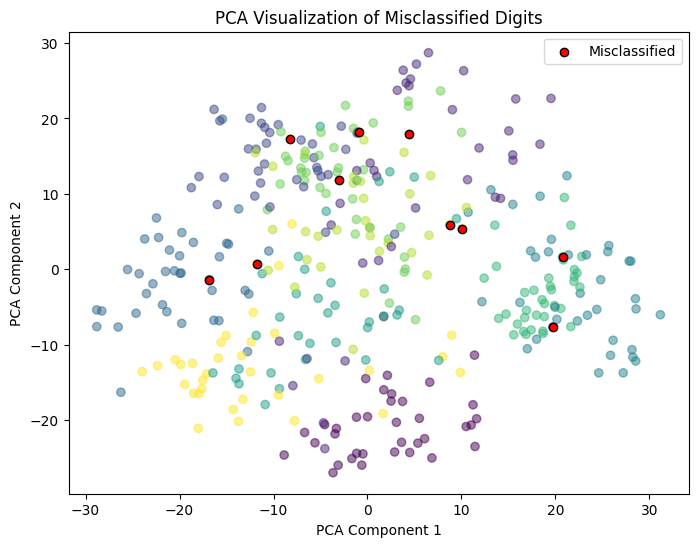

In [21]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

misclassified_idx = np.where(y_test != y_pred_optimized)[0]
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.scatter(X_test_pca[misclassified_idx, 0], X_test_pca[misclassified_idx, 1], c='red', label='Misclassified', edgecolors='k')
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Misclassified Digits")
plt.show()

**PCA Visualization of Misclassified Digits**

The 2D PCA scatter plot helps visualize how digits are distributed in feature space.

Misclassified digits are marked in red.

Some clusters overlap, explaining why certain digits (e.g., 8, 9, 3) get confused.

📌 **Key Takeaways:**

PCA confirms the difficulty in distinguishing certain digits.

More feature engineering or deep learning methods (like CNNs) might help separate overlapping clusters.


#Final Summary

✔ Random Forest achieved a high accuracy of 97.22%. ✔ Misclassification mainly affects digits with similar structures (e.g., 8 & 3, 9 & 8).

 ✔ Feature importance highlights critical pixel areas for classification.

 ✔ Hyperparameter tuning stabilized performance but didn’t significantly improve accuracy.

 ✔ Cross-validation confirms model robustness with a mean accuracy of 94.04%.

 ✔ PCA visualization shows overlapping digit clusters, indicating the need for additional feature extraction techniques.

🔹 **Next Steps & Future Improvements:**

Try alternative models like Gradient Boosting (XGBoost, LightGBM) for potentially better performance.

Experiment with Convolutional Neural Networks (CNNs) to leverage spatial pixel relationships.

Perform additional feature extraction (e.g., edge detection, contour analysis) to better differentiate similar-looking digits.